In [1]:
# display the visual pattern that each filter is meant to respond to, apllying gradient ascent in the input space, maximizing the response of a specific filter and calculating the input images the filter is maximally responsive to
# they tell how a convolutional layer see the world, each layer see the input as a combination of these filters

In [2]:
from keras import backend as K
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os

2022-12-05 09:24:12.833461: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/francoterranova/opt/anaconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/francoterranova/opt/anaconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["dlopen(/Users/francoterranova/opt/anaconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so, 0x0006): symbol not found in flat namespace '__ZN3tsl2io7DirnameENSt3__117basic_string_viewIcNS1_11char_traitsIcEEEE'"]
  warnings.warn(f"unable to load libtensorflow_io_pl

In [12]:
model = load_model(os.path.join("..","models","CNN_baseline.h5"))

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [25]:
# turn it into a displayable image
def deprocess_image(x):
    # mean: 0, std: 1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clips to [0,1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [26]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# runs gradient ascent for a certain number of steps
steps = 40

def generate_pattern(layer_name, filter_index, size1=1920, size2=1080):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # gradient of the loss wrt to the model's input
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # normalize by dividing by its L2 norm
    iterate = K.function([model.input], [loss, grads])
    # starts from a gray image with some noise
    input_img_data = np.random.random((1, size1, size2, 3)) * 20 + 128.
    step = 1. # magnitude of each gradient update
    for i in range(steps):
        # obtain the loss value and gradient value
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step # adjust the input image in order to maximize the loss
    img = input_img_data[0]
    return deprocess_image(img)

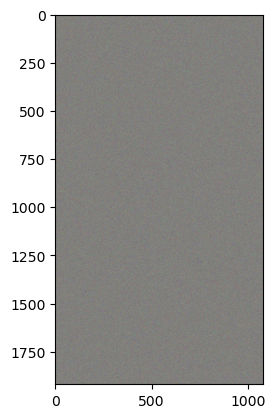

In [27]:
# pattern to which the 0-th channel in layer is responsive
plt.imshow(generate_pattern('conv2d_1', 0))

In [ ]:
# grid of all filter response patterns in a layer

# for simplicity the first 4 filters of the layer set, obtaining a 2x2 grid of the 4 filter patterns
layer_name = 'conv2d_1'
size1 = 1920
size2 = 1080
margin = 5
results = np.zeros((2 * size1 + 7 * margin, 2 * size2 + 7 * margin, 3))
for i in range(2):
    for j in range(2):
        print(i, j)
        filter_img = generate_pattern(layer_name, i + (j * 2))
        horizontal_start = i * size1 + i * margin
        horizontal_end = horizontal_start + size1
        vertical_start = j * size2 + j * margin
        vertical_end = vertical_start + size2
        results[horizontal_start: horizontal_end,vertical_start: vertical_end, :] = filter_img
plt.figure(figsize=(20, 20))
plt.imshow(results)

0 0
0 1
